Привет!

Это ноутбук-бейзлайн к конкурсу на каггл: https://www.kaggle.com/t/38353d5b42dd423e82f26794bed57bc1

Вам нужно постараться улучшить его, чтобы скор на каггле стал побольше =)
Тренировочные и тестовые данные лежат рядом с ноутбуком или их можно скачать с каггла.

In [1]:
import numpy as np
import pandas as pd

## 1. Get data

Загрузим данные и посмотрим на них:

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,25,UNM,SPC,26389.0,10,1.32,0.584105,SCH,ОБЛ КУРСКАЯ,35000.0,2.0,0.0,1
1,2,F,37,MAR,SPC,19588.0,12,1.43,0.718935,SCH,РЕСПУБЛИКА ТАТАРСТАН,15000.0,0.0,0.0,1
2,3,F,28,UNM,SPC,53669.0,18,1.10,0.586015,GRD,МОСКВА Г,70000.0,4.0,0.0,1
3,4,M,34,MAR,SPC,26349.0,10,1.43,0.655703,SCH,СВЕРДЛОВСКАЯ ОБЛАСТЬ,42500.0,4.0,0.0,0
4,5,F,43,MAR,UMN,11589.0,10,1.10,0.271893,GRD,РЯЗАНСКАЯ ОБЛАСТЬ,20000.0,3.0,0.0,0


In [3]:
X_train, y_train = train_data.drop("open_account_flg", axis=1), train_data["open_account_flg"]

## 2. Preprocessing

In [4]:
train_data.isna().any()

client_id               False
gender                  False
age                     False
marital_status          False
job_position            False
credit_sum              False
credit_month            False
tariff_id               False
score_shk               False
education               False
living_region            True
monthly_income          False
credit_count             True
overdue_credit_count     True
open_account_flg        False
dtype: bool

#### fill nans in "living region"

In [5]:
X_train["living_region"].value_counts()

ОБЛ МОСКОВСКАЯ                              8564
КРАСНОДАРСКИЙ КРАЙ                          5176
САНКТ-ПЕТЕРБУРГ                             3968
МОСКВА                                      3821
ТАТАРСТАН РЕСП                              3635
РЕСП БАШКОРТОСТАН                           3358
ОБЛ ИРКУТСКАЯ                               2863
СВЕРДЛОВСКАЯ ОБЛ                            2782
МОСКВА Г                                    2509
ОБЛ НИЖЕГОРОДСКАЯ                           2504
ОБЛ ЛЕНИНГРАДСКАЯ                           2235
РОСТОВСКАЯ ОБЛ                              2111
КРАСНОЯРСКИЙ КРАЙ                           2087
ЧЕЛЯБИНСКАЯ ОБЛ                             2047
ОБЛ САМАРСКАЯ                               2034
ОБЛ КЕМЕРОВСКАЯ                             1993
ПЕРМСКИЙ КРАЙ                               1930
САНКТ-ПЕТЕРБУРГ Г                           1866
КРАЙ СТАВРОПОЛЬСКИЙ                         1833
ОБЛ АСТРАХАНСКАЯ                            1756
ОБЛ ВОЛОГОДСКАЯ     

^ действительно, какой еще самый частый регион можно было ожидать. 

In [6]:
X_train["living_region"].fillna("ОБЛ МОСКОВСКАЯ", inplace=True)

In [40]:
data_region_feats = X_train[['living_region']].reset_index(drop=True)

data_region_feats['living_region'] = data_region_feats['living_region'].str.lower().str.strip()
data_region_feats.loc[data_region_feats['living_region']=='москва г', 'living_region'] = 'москва'
data_region_feats.loc[data_region_feats['living_region']=='санкт-петербург г', 'living_region'] = 'санкт-петербург'

data_region_feats['living_region'] = data_region_feats['living_region'].str.replace(' г.', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('г. ', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace(' г', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('г ', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('край', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('область', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('аобл', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('обл', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('республика', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('респ', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace(' ао', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('ао ', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('автономный', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('автономная', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('округ', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('.', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace(',', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('-', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace(' ', '')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('москвоская', 'московская')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('годинцовомосковская', 'московская')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('гмосква', 'москва')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('чувашиячувашская', 'чувашская')
data_region_feats['living_region'] = data_region_feats['living_region'].str.replace('чувашия', 'чувашская')
data_region_feats['living_region'] = data_region_feats['living_region'].str.strip()

reg_cnt = data_region_feats['living_region'].value_counts()

In [45]:
X_train.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,living_region_0,living_region_1,living_region_2,living_region_3
0,1,M,25,UNM,SPC,26389.0,10,1.32,0.584105,SCH,ОБЛ КУРСКАЯ,35000.0,2.0,0.0,1,0,0,0
1,2,F,37,MAR,SPC,19588.0,12,1.43,0.718935,SCH,РЕСПУБЛИКА ТАТАРСТАН,15000.0,0.0,0.0,1,0,0,0
2,3,F,28,UNM,SPC,53669.0,18,1.10,0.586015,GRD,МОСКВА Г,70000.0,4.0,0.0,1,0,0,0
3,4,M,34,MAR,SPC,26349.0,10,1.43,0.655703,SCH,СВЕРДЛОВСКАЯ ОБЛАСТЬ,42500.0,4.0,0.0,1,0,0,0
4,5,F,43,MAR,UMN,11589.0,10,1.10,0.271893,GRD,РЯЗАНСКАЯ ОБЛАСТЬ,20000.0,3.0,0.0,1,0,0,0


In [ ]:
data_region_feats

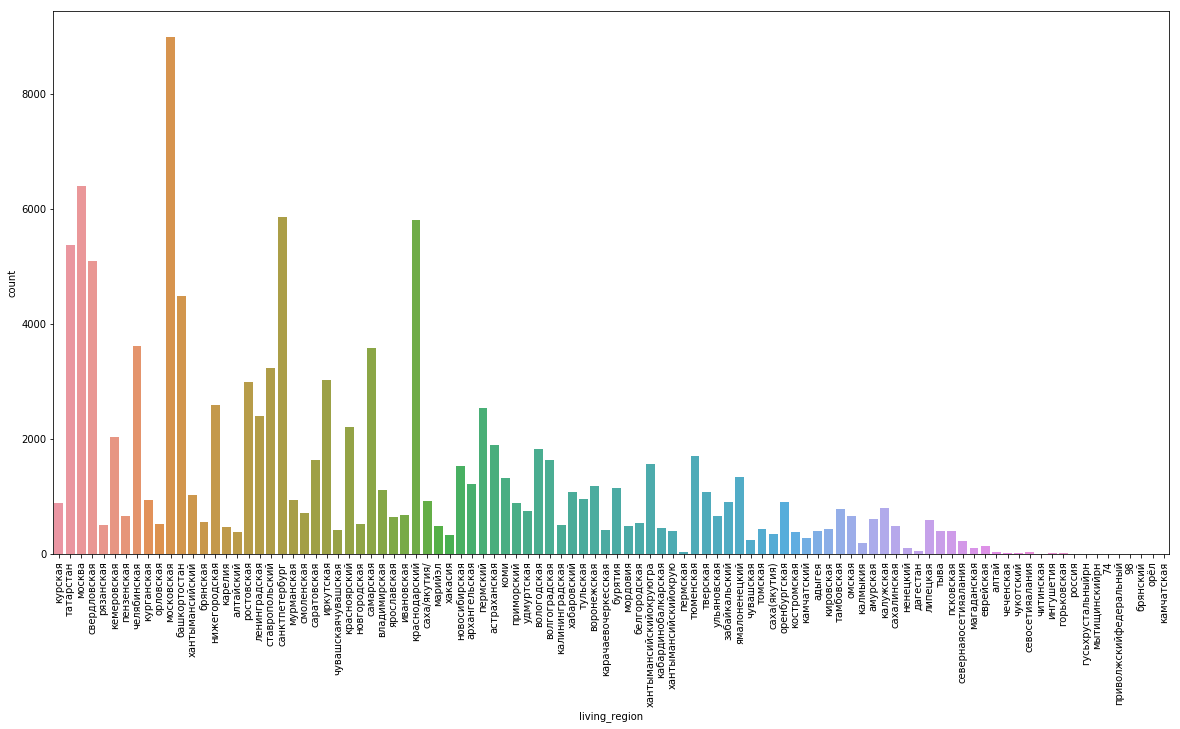

In [21]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=90)
sns.countplot(data_region_feats['living_region'], ax=ax,)

#### fill nans in "credit_count"

In [7]:
X_train["credit_count"].value_counts()

1.0     31714
2.0     25799
0.0     18219
3.0     16707
4.0      9826
5.0      5285
6.0      2760
7.0      1345
8.0       707
9.0       326
10.0      141
11.0       90
12.0       56
13.0       25
14.0       12
15.0       10
17.0        4
19.0        3
16.0        2
18.0        1
Name: credit_count, dtype: int64

In [8]:
X_train["credit_count"].fillna(0., inplace=True)

#### fill nans in "overdue_credit_count"

In [9]:
X_train["overdue_credit_count"].value_counts()

0.0    107812
1.0      5180
2.0        36
3.0         4
Name: overdue_credit_count, dtype: int64

In [10]:
X_train["overdue_credit_count"].fillna(0., inplace=True)

#### fill nans in "monthly income"

In [11]:
X_train["monthly_income"].median()

35000.0

In [12]:
X_train["monthly_income"].fillna(X_train["monthly_income"].median(), inplace=True)

### Dealing with categorical features

#### In a baseline lets delete "living_region" feature as its categorical and has too many values)

In [13]:
X_train.drop("living_region", axis=1, inplace=True)

In [14]:
cat_features = [i[0] for i in dict(X_train.dtypes).items() if 'obj' in str(i[1])]+["tariff_id"]
cat_features

['gender', 'marital_status', 'job_position', 'education', 'tariff_id']

#### Convert categirical features to numerical and binarize them

In [15]:
X_train.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count
0,1,M,25,UNM,SPC,26389.0,10,1.32,0.584105,SCH,35000.0,2.0,0.0
1,2,F,37,MAR,SPC,19588.0,12,1.43,0.718935,SCH,15000.0,0.0,0.0
2,3,F,28,UNM,SPC,53669.0,18,1.10,0.586015,GRD,70000.0,4.0,0.0
3,4,M,34,MAR,SPC,26349.0,10,1.43,0.655703,SCH,42500.0,4.0,0.0
4,5,F,43,MAR,UMN,11589.0,10,1.10,0.271893,GRD,20000.0,3.0,0.0


In [16]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
X_train = pd.get_dummies(X_train, columns=cat_features)

In [17]:
X_train.head()

,client_id,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,gender_F,gender_M,...,tariff_id_1.48,tariff_id_1.5,tariff_id_1.52,tariff_id_1.56,tariff_id_1.6,tariff_id_1.7,tariff_id_1.9,tariff_id_1.91,tariff_id_1.94,tariff_id_1.96
0,1,25,26389.0,10,0.584105,35000.0,2.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,37,19588.0,12,0.718935,15000.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,28,53669.0,18,0.586015,70000.0,4.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,34,26349.0,10,0.655703,42500.0,4.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,43,11589.0,10,0.271893,20000.0,3.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_train.drop(["gender_F", "client_id"], axis=1, inplace=True)

In [19]:
X_train["year_credit_sum"] = X_train["credit_sum"]/X_train["credit_month"]

## 3. Build the model

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


На каггле наши ответы будут оцениваться метрикой AUC ROC. 

Натренируем Random Forest

In [21]:
rf = RandomForestClassifier()

params = {
    'n_estimators' : [10, 100],
    'max_depth' : [None, 3, 9],
    
}

gsv_rf = GridSearchCV(rf, param_grid=params, scoring='roc_auc', cv=5, verbose=2)
gsv_rf.fit(X_train, y_train)
gsv_rf.best_params_, gsv_rf.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=None, n_estimators=10 .................................
[CV] ........................ max_depth=None, n_estimators=10 -   1.6s
[CV] max_depth=None, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ........................ max_depth=None, n_estimators=10 -   1.6s
[CV] max_depth=None, n_estimators=10 .................................
[CV] ........................ max_depth=None, n_estimators=10 -   1.6s
[CV] max_depth=None, n_estimators=10 .................................
[CV] ........................ max_depth=None, n_estimators=10 -   1.6s
[CV] max_depth=None, n_estimators=10 .................................
[CV] ........................ max_depth=None, n_estimators=10 -   1.6s
[CV] max_depth=None, n_estimators=100 ................................
[CV] ....................... max_depth=None, n_estimators=100 -  15.2s
[CV] max_depth=None, n_estimators=100 ................................
[CV] ....................... max_depth=None, n_estimators=100 -  15.6s
[CV] max_depth=None, n_estimators=100 ................................
[CV] ....................... max_depth=None, n_estimators=100 -  15.1s
[CV] max_depth=None, n_estimators=100 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.2min finished


({'max_depth': 9, 'n_estimators': 100}, 0.742147069728247)

XGBoost с оберткой над sklearn:

In [57]:
import xgboost as xgb

clf = xgb.XGBClassifier(n_jobs=-1)
params = {
    'n_estimators' : [10, 50, 100, 500],
    'max_depth' : [3, 5],
}

gsv_xgb = GridSearchCV(clf, param_grid=params, scoring='roc_auc', cv=5, verbose=1)
gsv_xgb.fit(X_train, y_train)
gsv_xgb.best_params_, gsv_xgb.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 20.8min finished


({'max_depth': 5, 'n_estimators': 100}, 0.7530697314352183)

XGBoost без обертки

In [100]:
dtrain = xgb.DMatrix(X_train[:4*len(X_train)//5], y_train[:4*len(X_train)//5])
dvalid = xgb.DMatrix(X_train[4*len(X_train)//5:], y_train[4*len(X_train)//5:])

params = {
    'n_estimators' : 1000,
    'max_depth' : 3,
    'eval_metric': 'auc'
}

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
bst = xgb.train(params, dtrain, 1000, evals = watchlist, 
    early_stopping_rounds=2,verbose_eval=1,
    maximize=True)

[18:04:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.667229	valid-auc:0.66784
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 2 rounds.
[18:04:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.683364	valid-auc:0.682402
[18:04:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-auc:0.698822	valid-auc:0.698966
[18:04:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-auc:0.712274	valid-auc:0.712276
[18:04:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-auc:0.715483	valid-auc:0.714154
[18:04:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pru

Натренируем на всех примерах:

In [24]:
rf = RandomForestClassifier(n_estimators=100, max_depth=9)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 4. Process test data

In [57]:
X_test = pd.read_csv("test.csv")
X_test.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count
0,119519,F,24,MAR,SPC,28429.0,18,1.10,0.593836,GRD,ОБЛ ИРКУТСКАЯ,33000.0,3.0,0.0
1,119520,M,25,UNM,SPC,15997.0,10,1.60,0.615015,SCH,УЛЬЯНОВСКАЯ ОБЛ,35000.0,2.0,0.0
2,119521,M,25,UNM,SPC,11043.0,10,1.16,0.666758,SCH,РЕСП БАШКОРТОСТАН,25000.0,3.0,0.0
3,119522,F,34,MAR,SPC,14617.0,10,1.40,0.447745,GRD,ПЕНЗЕНСКАЯ ОБЛ,15000.0,2.0,0.0
4,119523,M,33,MAR,SPC,38147.0,12,1.60,0.706974,UGR,ОБЛ МОСКОВСКАЯ,55000.0,1.0,0.0


In [58]:
ids = X_test['client_id']

Нам нужно предобработать тестовые данные точно так же, как тренировочные, чтобы можно было засовывать их в модели, обученные на тренировочных данных. 

In [59]:
X_test.isna().any()

client_id               False
gender                  False
age                     False
marital_status          False
job_position            False
credit_sum              False
credit_month            False
tariff_id               False
score_shk               False
education               False
living_region            True
monthly_income           True
credit_count             True
overdue_credit_count     True
dtype: bool

In [60]:
X_test.drop("living_region", axis=1, inplace=True)

In [61]:
X_test["monthly_income"].fillna(X_train["monthly_income"].median(), inplace=True)
X_test["credit_count"].fillna(0., inplace=True)
X_test["overdue_credit_count"].fillna(0., inplace=True)

In [62]:
X_test = pd.get_dummies(X_test, columns=cat_features)

In [63]:
X_test.head()

,client_id,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,gender_F,gender_M,...,tariff_id_1.43,tariff_id_1.44,tariff_id_1.48,tariff_id_1.5,tariff_id_1.52,tariff_id_1.6,tariff_id_1.7,tariff_id_1.9,tariff_id_1.91,tariff_id_1.94
0,119519,24,28429.0,18,0.593836,33000.0,3.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,119520,25,15997.0,10,0.615015,35000.0,2.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,119521,25,11043.0,10,0.666758,25000.0,3.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,119522,34,14617.0,10,0.447745,15000.0,2.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,119523,33,38147.0,12,0.706974,55000.0,1.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [64]:
X_test.drop("gender_F", axis=1, inplace=True)

In [65]:
X_test["year_credit_sum"] = X_test["credit_sum"]/X_test["credit_month"]

In [66]:
test_columns = [column for column in X_train.columns if column in X_test.columns]
X_test = X_test[test_columns]

Выделим колонки, которых нет в X_test, но есть в X_train

In [67]:
missing_columns = [column for column in X_train.columns if column not in X_test.columns]
missing_columns

['tariff_id_1.27', 'tariff_id_1.29', 'tariff_id_1.56', 'tariff_id_1.96']

In [68]:
for column in missing_columns:
    X_test[column] = np.zeros(len(X_test))

## 5. Get file with answers

Для roc auc нужны предсказания **вероятностей** классов (точнее, первого класса -- единицы), а не просто 0 или 1. Поэтому для моделей из sklearn нужно мспользовать .predict_proba(), чтобы получить вероятности:

In [97]:
# получим предсказания Random Forest
preds = rf.predict_proba(X_test[X_train.columns])[:, 1]

In [98]:
preds.mean()

0.17651704644587662

А xgboost, который не обернут в sklearn, выдает вероятности принадлежности 1 классу просто с помощью .predict():

In [101]:
dtest = xgb.DMatrix(X_test[X_train.columns])
preds = bst.predict(dtest)

In [102]:
preds

array([0.2528119 , 0.16468456, 0.24838322, ..., 0.08100763, 0.04488313,
       0.17579028], dtype=float32)

In [103]:
X_test['client_id'] = ids
X_test['open_account_flg'] = preds

In [104]:
X_test[['client_id', 'open_account_flg']].to_csv("sampleSubmission.csv", index=None)